1\. Write a function that converts number representation (bin<->dec<->hex)

In [137]:
#Universal base converter: takes number, starting base and resulting base as arguments. Use string type for numbers that uses letter
def conversion(x,from_=10,to_=2):
    digit=['0','1','2','3','4','5','6','7','8','9','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
    
    def from10(x,to_):
        out=[]
        strout=""
        v=True
        while v==True:
            a=x%to_
            out.insert(0,digit[a])
            x=x//to_
            if x==0: v=False
        for n in range(len(out)):
            strout=strout+out[n]
        return(strout)
    
    def to10(x,from_):
        strin=str(x)
        tot=0
        for n,val in enumerate(strin):
            for j,i in enumerate(digit):
                if i==val: 
                    tot=tot+j*from_**(len(strin)-n-1)
        return tot
    
    if from_>36 or to_>36:
        print("ERROR: Out of range!")
        
    elif from_==10:
        ret_val=from10(x,to_)
        return ret_val
             
    elif from_!=10 and to_==10:
        ret_val=to10(x,from_)
        return ret_val
    
    else:
        ret_val=to10(x,from_)
        ret_val=from10(ret_val,to_)
        return ret_val


ciao=5
carlo = conversion(ciao)
print(carlo)

101


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [172]:
#La parola è sequenza di numeri as str, sia decimale che binario

def make_float(x, base=2):
    sign=+1
    n=str(x)
    mant_n=0
    #Solution for decimal numbers
    if type(x)==int and x<0:
        x=x*-1
        sign=-1
    if base!=2:
        n=str(conversion(x,base,2))
        print(n)  
    #Check if the lenght is correct
    if len(n)!=32:
        print("ERROR: Wrong number of bits")
    #Doing the conversion
    else:
        if   n[0]=='0': sign=1
        elif n[0]=='1': sign=(-1)
        expo_str=n[1:9]
        expo_n=(conversion(expo_str,2,10))-127
        mant='1'+str(n[9:])
        for i, m in enumerate(mant):
            mant_n+=2**(-i+expo_n)*int(m)
        mant_n=mant_n*sign
        return mant_n
    

eg='01000010010110111001000100000000'
print(make_float(eg))


54.8916015625


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

In [205]:
#Determine overflow
n=0.
i=True

while i==True:
    try:
        f=(2**n)
        #if n%1000==0: 
            #print(len(str(f)))
            #print(type(f))
        n+=1
    except:
        print("Overflow was reached using 2^",n)
        i=False
n=0
f=1
j=True
while j==True:
    if f!= 0.0:
        f=(2**(-n))
        n+=1
    else:
        print("Underflow was reached using 2^",n-1)
        j=False


Overflow was reached using 2^ 1024.0
Underflow was reached using 2^ 1075


4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In [216]:
n=1
a=1
b=1.5
while a!=b:
    a+=(2**-n)
    b+=(2**-(n+1))
    #print(a,b)
    n+=1
print("The machine precision is reached with 2^", n)

The machine precision is reached with 2^ 54


5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [241]:
#Solve a quadratic equation
def solve_1(a,b,c):
    x1=(-b+(b**2-4*a*c)**(0.5))/(2*a)
    x2=(-b-(b**2-4*a*c)**(0.5))/(2*a)
    return x1,x2

def solve_2(a,b,c):
    x1=2*c/(-b-(b**2-4*a*c)**(0.5))
    x2=2*c/(-b+(b**2-4*a*c)**(0.5))
    #print("x1=",x1,'x2=',x2)
    return x1,x2

def solve_3 (a,b,c):
    x1=2*c/(-b-(b**2-4*a*c)**(0.5))
    x2=(-b-(b**2-4*a*c)**(0.5))/(2*a)
    #print("x1=",x1,'x2=',x2)
    return x1,x2


a=0.001
b=1000
c=0.001
#Should be x1=-1e-6, x2=-10e6
print(solve_1(a,b,c))
print(solve_2(a,b,c))
print(solve_3(a,b,c))

# When 4ac is really small the algorithm is numerically unstable when it subtract two very close numbers: b and sqrt(b^2-4ac)
# In particular solve_1 is less precise with the solution (-1e-6) - when it has to make a subtraction- while
# solve_2 is less precise with the solution (1e6)
# Solve_3 combines the best algorithms from the previous functions in order to obtain the best solutions


(-9.999894245993346e-07, -999999.999999)
(-1.000000000001e-06, -1000010.5755125057)
(-1.000000000001e-06, -999999.999999)


###### 5. Comment:
When $4ac$ is really small the algorithm is numerically unstable when it have to subtract two very close numbers: $b$ and $\sqrt{b^2-4ac}$

In particular $\textit{solve_1}$ is less precise with the solution (-1e-6) - when it has to make a subtraction- while $\textit{solve_2}$ is less precise with the solution (1e6).

$\textit{Solve_3}$ combines the best algorithms from the previous functions in order to obtain the best solutions


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

df/dx= (1.010000000000001, 'with and accuracy of', -0.010000000000000897)
df/dx= (1.0000999999998899, 'with and accuracy of', -9.999999988985486e-05)
df/dx= (1.0000009999177333, 'with and accuracy of', -9.99917733279787e-07)
df/dx= (1.0000000039225287, 'with and accuracy of', -3.922528746258536e-09)
df/dx= (1.000000082840371, 'with and accuracy of', -8.284037100736441e-08)
df/dx= (1.0000889005833413, 'with and accuracy of', -8.890058334132256e-05)
df/dx= (0.9992007221626509, 'with and accuracy of', 0.0007992778373491216)


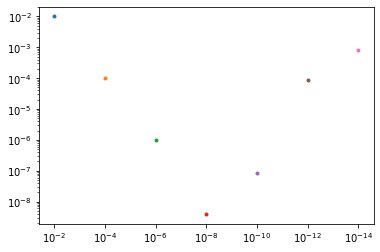

In [27]:
import matplotlib.pyplot as plt
from math import log

def func(x):
    return x*(x-1)

def derivative(x,delta):
    return (func(x+delta)-func(x))/delta

x=1
deltas=[1e-2,1e-4,1e-6,1e-8,1e-10,1e-12,1e-14]
for j,i in enumerate(deltas):
    accuracy=1-derivative(x,i)
    print('df/dx=',(abs(derivative(x,i)),'with and accuracy of', accuracy))
    plt.plot(j, abs(accuracy), marker=".")
plt.xticks(range(7),['$10^{−2}$','$10^{−4}$', '$10^{−6}$', '$10^{−8}$', '$10^{−10}$', '$10^{−12}$', '$10^{−14}$'])
plt.yscale("log")
plt.show()

###### 6.Comment
The accuracy is increased by two orders of magnitude at every steps from $\delta= 10^{−2}$ to $\delta = 10^{−8}$, then it starts to diverge due to the similarity between $f(x+\delta)$ and $f(x)$

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt{(1-x^2)} {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [88]:
from math import sqrt
from math import pi
from time import perf_counter

def int_circ(n):
    plus=0.
    h=2./n
    for i in range(N):
        j=-1+i*2./n
        plus+=h*sqrt(1-j**2)
    accuracy=pi/2-plus
    return plus, accuracy


N=100
aha,acc=int_circ(N)
print(aha)
print(acc, '\n')

t=True
N=3410000

while t==True:
    t0= perf_counter()
    int_circ(N)
    t1= perf_counter()
    t1= t1 - t0
    #print(t1, N)
    if t1<1: N+=1000
    else: 
        t=False
        print(N, t1, int_circ(N))
        
N=200000000
t=True

while t==True:
    t0= perf_counter()
    int_circ(N)
    t1= perf_counter()
    t1= t1 - t0
    #print(t1, N)
    if t1<60: N+=10000000
    else: 
        t=False
        print(N, t1, int_circ(N))
        

1.5691342555492505
0.0016620712456461018 

3412000 1.4248198999994202 (1.5707963265309552, 2.6394131324991577e-10)
200000000 60.45315110000047 (1.5707963267944416, 4.549693954913892e-13)


###### 7.Comment:
The value of N request to compute the integral in one second is around 3'429'000. The difference between the result and $\frac{\pi}{2}$ is $2.62\cdot 10^{-10}$.

The value of N request to compute the integral in one minute is around 220'000'000. The difference between the result and $\frac{\pi}{2}$ is $6.01\cdot 10^{-13}$.